In [26]:
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Let's read in the data
df = pd.read_excel('nba_ht_wt.xls')

In [4]:
# Let's check the top rows
df.head()

,Player,Pos,Height,Weight,Age,School,BDate
0,Vitor Faverani,C,83,260,25,None,1988-05-05
1,Avery Bradley,G,74,180,22,Texas,1990-11-26
2,Keith Bogans,G,77,215,33,Kentucky,1980-05-12
3,Jared Sullinger,F,81,260,21,Ohio State,1992-03-04
4,Jeff Green,F,81,235,27,Georgetown,1986-08-28


In [5]:
# We will only look into the weight
df = df[['Weight']]
df.head()

,Weight
0,260
1,180
2,215
3,260
4,235


In [6]:
df.shape

(505, 1)

C:\Users\Hynda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


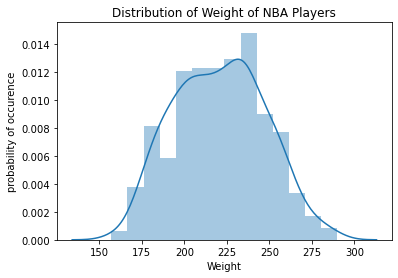

In [7]:
sns.distplot(df['Weight'])
plt.xlabel("Weight")
plt.ylabel("probability of occurence")
plt.title("Distribution of Weight of NBA Players");

In [8]:
# Population mean weight
pop_mean_weight = df['Weight'].mean()
pop_mean_weight

220.67326732673268

In [9]:
# Population STD
pop_std_dev_weight = df['Weight'].std()
pop_std_dev_weight

26.643110470317723

In [10]:
sample_means = []
n = 35
for sample in range(0, 300):
    # random sampling done with replacement
    sample_values = np.random.choice(a=df['Weight'], size=n)    
    sample_mean = np.mean(sample_values)
    sample_means.append(sample_mean)

C:\Users\Hynda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'frequency of occurence')

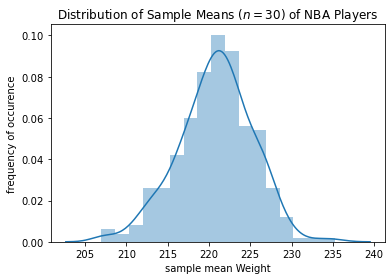

In [11]:
sns.distplot(sample_means)
plt.title("Distribution of Sample Means ($n=30$) of NBA Players")
plt.xlabel("sample mean Weight")
plt.ylabel("frequency of occurence")

In [12]:
# Sample mean weight
sample_mean_weight = np.mean(sample_means)
sample_mean_weight

220.7942857142857

In [13]:
# Sample STD
sample_std_dev_weight = np.std(sample_means)
sample_std_dev_weight

4.491041422790987

In [14]:
# Standard Error
standard_error = pop_std_dev_weight/np.sqrt(n)
standard_error

4.503507634638182

In [15]:
# A new team was selected with the mean weight as 233, test if this is significantly different from 220
# H0 = Weight = 220
# H1 = Weight !=220

In [16]:
new_sample_mean = 233
z_score = (new_sample_mean - sample_mean_weight)/standard_error
z_score

2.7102683676686867

In [17]:
p_value = 1 - stats.norm.cdf(z_score)

In [18]:
p_value*2

0.00672287877895994

In [19]:
# Since P is less than 0.05, We Reject the Null Hypothesis

In [20]:
stats.norm.ppf(.975)

1.959963984540054

In [21]:
LCV = new_sample_mean - 1.96*standard_error
UCV = new_sample_mean + 1.96*standard_error
print('{0}, {1}'.format(LCV, UCV))

224.17312503610916, 241.82687496389084


C:\Users\Hynda\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


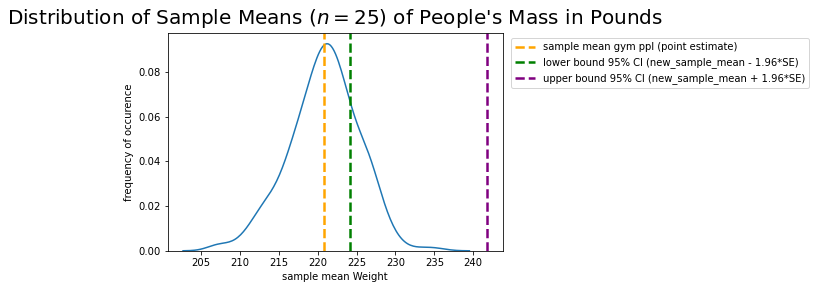

In [22]:
sns.distplot(sample_means, hist=False)
plt.title("Distribution of Sample Means ($n=25$) of People's Mass in Pounds", y=1.015, fontsize=20)
plt.axvline(x=sample_mean_weight, linestyle='--', linewidth=2.5, label="sample mean gym ppl (point estimate)", c='orange')
plt.axvline(x=LCV, linestyle='--', linewidth=2.5, label="lower bound 95% CI (new_sample_mean - 1.96*SE)", c='g')
plt.axvline(x=UCV, linestyle='--', linewidth=2.5, label="upper bound 95% CI (new_sample_mean + 1.96*SE)", c='purple')
plt.xlabel("sample mean Weight")
plt.ylabel("frequency of occurence")
plt.legend(bbox_to_anchor=(1.01, 1), loc="upper left")

In [29]:
n = 4
p = 3/5
runs = 1000
# np.random.binomial(n, p, 1000)
sum([1 for i in np.random.binomial(n, p, size=runs) if i==3])/runs

0.366

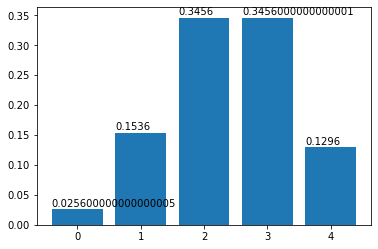

In [30]:
x = range(0,5)
n = 4
p = 3/5
bars= plt.bar(x, stats.binom.pmf(x, n, p))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, yval)
plt.show()

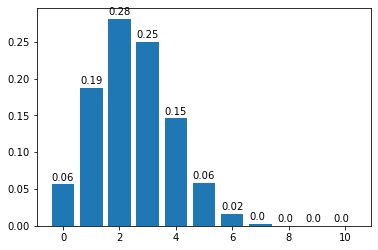

In [31]:
x = range(0,11)
n = 10
p = 1/4
bars= plt.bar(x,stats.binom.pmf(x, n, p))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval,2))
plt.show()

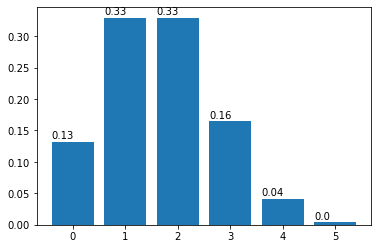

In [32]:
x = range(0,6)
n = 5
p = 1/3
bars= plt.bar(x,stats.binom.pmf(x, n, p))
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .005, round(yval,2))
plt.show()

In [34]:
# Expected Value Calculation
x = range(0,6)
n = 5
p = 1/3
prob = stats.binom.pmf(x, n, p)
randvar = [400, -100]
expected_value = randvar[0]*prob[-1]+randvar[-1]*sum(prob[0:4])
print(expected_value)

-93.82716049382718
